# Bonus Problem 6

In Chapter 13.1 to Chapter 13.2.3 in A. Beck (2017), the Generalized Conditional Gradient Method is described as a way of solving composite problems with the structure:

\begin{align*}
    \text{min}\{ F(x) \equiv f(x) + g(x) \}
\end{align*}

Where the assumptions listed in Assumption 13.1 are made on $f$ and $g$. In the Generalized Conditional Gradient Method each iteration consists of the following calculations: 

$p_k = p(x_k)$ is chosen among: 

\begin{align*}
    p_k = p(x_k) \in \underset{p \in E}{\text{argmin}} \{ p \cdot ∇f(x_k) + g(p) \}
\end{align*}

Where $E$ is the space that $g$ and $f$ operate on. And then $t_k$ is chosen $t_k \in [0, 1]$ and:

\begin{align*}
    x_{k+1} = x_k + t_k(p_k − x_k)
\end{align*}

And the starting point $x_0$ needs to fulfill: $x_0 \in dom(g)$

The definition for the conditional gradient norm $S(x)$ is defined in the book as follows: 

\begin{align*}
    S(x) \equiv \nabla f(x) \cdot (x - p(x)) + g(x) - g(p(x))
\end{align*}


Our problem is the following: 

\begin{align*}
    & \underset{x \in \mathbb{R}^n}{\text{maximize}} \left\{ \frac{1}{2} x^T A x \right\} \\
    & \text{subject to: }  ||x||_2 \leq 1 
\end{align*}

Which can be reformulated as: 

\begin{align*}
    & \underset{x \in \mathbb{R}^n}{\text{minimize}} \left\{ f(x) + g(x) \right\} \\
\end{align*}

where $f(x) = -\frac{1}{2} x^T A x $ and $g(x) = \delta_{||.|| [0, 1]}(x)$ where: 

\begin{align*}
    \delta_{||.|| [0, 1]}(x) = 
    \begin{cases}
        0, & ||x||_2 \leq 1 \\
        \infty, & \text{otherwise}
    \end{cases}
\end{align*}

Applying the conditional gradient method on this problem results in the following update formula for $x_k$: (This exact derivation of the update formula is found in the book in Examples: 13.10 and 13.11)

\begin{equation*}
    x_{k+1} = \frac{A x_k}{ ||A x_k ||_2 }
\end{equation*}


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data specification: 
n = 1000

# Generating a random positive semidefinite matrix A: 
P = np.random.randn(n, n)
A = P.T @ P

# Generating a random initial point x0 with unit 2-norm (length 1):
x0 = np.random.randn(n)
x0 = x0/np.linalg.norm(x0, 2)

np.float64(1.0)

In [54]:
def F(A, x):
    if not is_in_area(x):
        return np.inf
    return -0.5 * x.T @ A @ x

def grad_F(A, x):
    return -A @ x

def is_in_area(x):
    return np.linalg.norm(x, 2) <= 1

def S(A, x):
    grad_F_x = grad_F(A, x)
    return grad_F_x @ x + np.linalg.norm(grad_F_x, 2)

def power_method(A, x0, max_iter=1000):
    x_cur = x0
    
    best_conditional_grad_norm = S(A, x_cur)
    conditional_grad_norms = [best_conditional_grad_norm]
    best_conditional_grad_norms = [best_conditional_grad_norm]

    for _t in range(max_iter):
        A_x_cur = A @ x_cur
        x_next = A_x_cur / np.linalg.norm(A_x_cur, 2)
        
        x_cur = x_next

        # Storing the results for plotting: 
        conditional_grad_norm = S(A, x_cur)

        if conditional_grad_norm < best_conditional_grad_norm:
            best_conditional_grad_norm = conditional_grad_norm
        
        conditional_grad_norms.append(conditional_grad_norm)
        best_conditional_grad_norms.append(best_conditional_grad_norm)       

    return conditional_grad_norms, best_conditional_grad_norms, x_cur

In [55]:
conditional_grad_norms, best_conditional_grad_norms, x_star = power_method(A, x0, 1000)

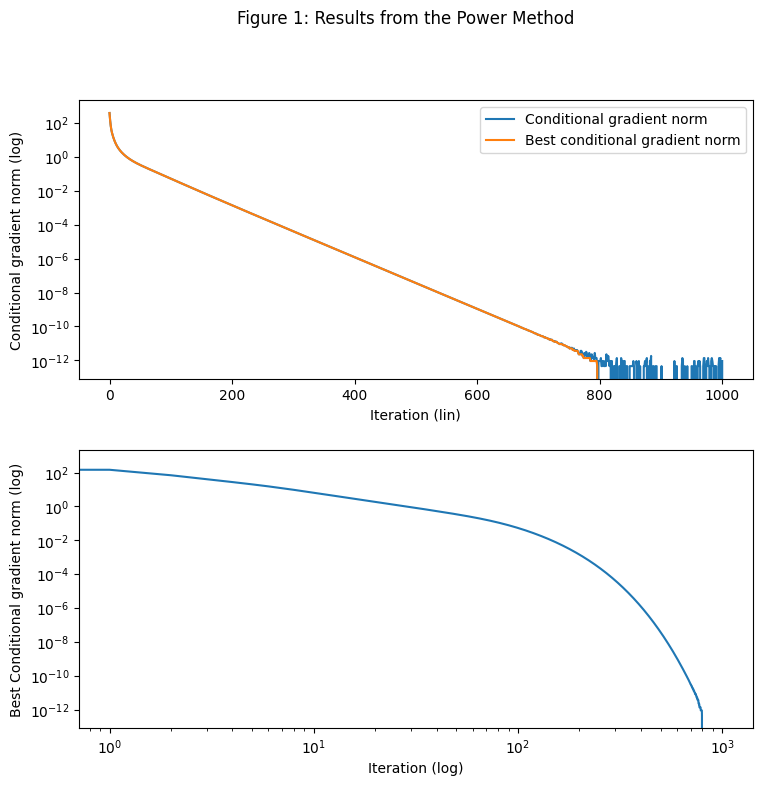

In [58]:
# Plotting the results:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
fig.suptitle('Figure 1: Results from the Power Method')

plt.tight_layout(pad=3.0)
axs[0].plot(conditional_grad_norms, label='Conditional gradient norm')
axs[0].plot(best_conditional_grad_norms, label='Best conditional gradient norm')
axs[0].legend()
axs[0].set_xlabel('Iteration (lin)')
axs[0].set_ylabel('Conditional gradient norm (log)')
axs[0].set_yscale('log')

axs[1].plot(best_conditional_grad_norms)
axs[1].set_xlabel('Iteration (log)')
axs[1].set_xscale('log')
axs[1].set_ylabel('Best Conditional gradient norm (log)')
axs[1].set_yscale('log')

In [59]:
print(is_in_area(x_star))

True


# Theory:

Write Theorem 13.9 here


# Discussion

The results seem to align well with the theorem bla bla bla... 